# Google Drive Mounting 

In [51]:
from google.colab import drive

In [52]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Load x_features and y_features



In [53]:
import pickle
#x_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project_Covid_Normal/x_features.pkl','rb'))
#y_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project_Covid_Normal/y_features.pkl','rb'))
x_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project_500/x_features.pkl','rb'))
y_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project_500/y_features.pkl','rb'))

In [54]:
import pickle
#x_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project/x_features_resized.pkl','rb'))
#y_features = pickle.load(open('/content/drive/MyDrive/Capstone_Project/y_features_resized.pkl','rb'))

'Edema'

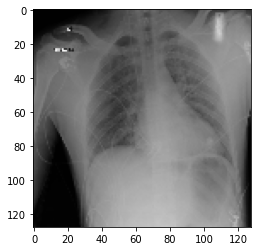

In [55]:
import matplotlib.pyplot as plt
plt.imshow(x_features[15])
y_features[15]

In [56]:
x_features[0].shape,y_features[0]

((128, 128, 3), 'Edema')

In [57]:
import tensorflow 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain = le.fit_transform(y_features)
y_train_data = tensorflow.keras.utils.to_categorical(ytrain, 16)
y_train_data.shape,y_train_data[0]

((7432, 16),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [58]:
y_train_data[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [59]:
ytrain

array([4, 4, 4, ..., 0, 0, 0])

# Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [60]:
import numpy  
xtrain_arr = numpy.array(x_features) 
xtrain_arr.shape,xtrain_arr[0].shape

((7432, 128, 128, 3), (128, 128, 3))

In [61]:
x_train_data = xtrain_arr.astype('float32')

#Normalizing the input
x_train_data /= 255.0
print('x_train_data shape:', x_train_data.shape)
print(x_train_data.shape[0], 'train samples')

x_train_data shape: (7432, 128, 128, 3)
7432 train samples


In [62]:
y_train_data.shape

(7432, 16)

## Split the data into training and validation data from `x_train_data` and `y_train_data` obtained from above steps

In [63]:
from sklearn.model_selection import train_test_split
x_train_test, x_val, y_train_test, y_val = train_test_split(x_train_data, y_train_data, test_size=0.20, random_state=1,stratify=y_train_data,shuffle=True)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_train_test, y_train_test, test_size=0.10, random_state=1,stratify=y_train_test,shuffle=True)

In [65]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((5350, 128, 128, 3), (5350, 16), (1487, 128, 128, 3), (1487, 16))

In [66]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15 
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    360
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    360
     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    360
          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    360
               0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    360
                    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    360
                         0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    360
                              0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    360
                                   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    360
                                             0.0  1.0  0.0  0.0  0.0  0.0  0.0    360
                                                  0.0  1.0  0

In [67]:
import pandas as pd
pd.DataFrame(y_val).value_counts()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15 
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    100
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    100
     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    100
          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    100
               0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    100
                    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    100
                         0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    100
                              0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    100
                                   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    100
                                             0.0  1.0  0.0  0.0  0.0  0.0  0.0    100
                                                  0.0  1.0  0

In [68]:
import pandas as pd
pd.DataFrame(y_test).value_counts()

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15 
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    40
0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    40
     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    40
          0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    40
               0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    40
                    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    40
                         0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    40
                              0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    40
                                   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0    40
                                             0.0  1.0  0.0  0.0  0.0  0.0  0.0    40
                                                  0.0  1.0  0.0  0.0  0

# Model Building

### Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

In [69]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [70]:
img_in = Input(x_train.shape[1:])              #input of model 
model = DenseNet121(include_top= False , # remove  the 3 fully-connected layers at the top of the network
                weights='imagenet',      # pre train weight 
                input_tensor= img_in, 
                input_shape= x_train.shape[1:],
                pooling ='avg') 

x = model.output  
predictions = Dense(16, activation="sigmoid", name="predictions")(x)    # fuly connected layer for predict class 
model = Model(inputs=img_in, outputs=predictions)

In [71]:
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.binary_accuracy])

In [72]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [73]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

In [74]:
#Training on the dataset
model_history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=80,
          verbose=1,
          validation_data=(x_val, y_val),callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/80
168/168 [==============================] - 34s 149ms/step - loss: 0.2825 - binary_accuracy: 0.9048 - val_loss: 0.2621 - val_binary_accuracy: 0.9197
Epoch 2/80
168/168 [==============================] - 24s 142ms/step - loss: 0.2091 - binary_accuracy: 0.9399 - val_loss: 0.2320 - val_binary_accuracy: 0.9363
Epoch 3/80
168/168 [==============================] - 23s 140ms/step - loss: 0.1971 - binary_accuracy: 0.9410 - val_loss: 0.2232 - val_binary_accuracy: 0.9359
Epoch 4/80
168/168 [==============================] - 24s 140ms/step - loss: 0.1843 - binary_accuracy: 0.9427 - val_loss: 0.2443 - val_binary_accuracy: 0.9300
Epoch 5/80
168/168 [==============================] - 24s 140ms/step - loss: 0.1783 - binary_accuracy: 0.9435 - val_loss: 0.5735 - val_binary_accuracy: 0.8867
Epoch 6/80
168/168 [==============================] - 24s 140ms/step - loss: 0.1722 - binary_accuracy: 0.9446 - val_loss: 0.2152 - val_binary_accuracy: 0.9389
Epoch 7/80
168/168 [==========================

In [76]:
from sklearn.metrics import roc_auc_score
aurocs = []
y_pred = model.predict(x_val)
for i in range(16):
  try:
    score = roc_auc_score(y_val[:, i], y_pred[:, i])
    aurocs.append(score)
  except ValueError:
    score = 0

In [98]:
for i in range(16):
  print('{} Accuracy = {}'.format(le.inverse_transform([i])[0],aurocs[i]))

Atelectasis Accuracy = 0.7414419610670512
Cardiomegaly Accuracy = 0.9235111751982696
Consolidation Accuracy = 0.7167988464311464
Covid19 Accuracy = 0.9885003604902668
Edema Accuracy = 0.8903460706560923
Effusion Accuracy = 0.7345926459985581
Emphysema Accuracy = 0.7595602018745494
Fibrosis Accuracy = 0.7537274693583274
Hernia Accuracy = 0.8875581756127832
Infiltration Accuracy = 0.7194160057678443
Mass Accuracy = 0.8141456380677722
No Finding Accuracy = 0.7213698630136987
Nodule Accuracy = 0.7222206200432589
Pleural_Thickening Accuracy = 0.6756308579668349
Pneumonia Accuracy = 0.6809585632370443
Pneumothorax Accuracy = 0.773266041816871


In [89]:
import numpy as np
mean_auroc = np.mean(aurocs)
mean_auroc

0.781440281037523

In [90]:
scores_train = model.evaluate(x_train, y_train, verbose=2)
print("Accuracy on Train Data: %.2f%%" % (scores_train[1]*100))

168/168 - 6s - loss: 7.4141e-04 - binary_accuracy: 1.0000
Accuracy on Train Data: 100.00%


In [91]:
scores_val = model.evaluate(x_val, y_val, verbose=2)
print("Accuracy on Val Data: %.2f%%" % (scores_val[1]*100))

47/47 - 2s - loss: 0.3001 - binary_accuracy: 0.9357
Accuracy on Val Data: 93.57%


In [92]:
scores_test = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy on Test Data: %.2f%%" % (scores_test[1]*100))

19/19 - 2s - loss: 0.3223 - binary_accuracy: 0.9324
Accuracy on Test Data: 93.24%


In [93]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('final_model.h5')